<a id='top'></a>
# *Epidemics*

In this notebook are introduced basilar versions of the SI/SIS/SIR models: for more advanced customizations refer to the ``NDlib`` documentation

In [24]:
pip install ndlib

In [25]:
import ndlib

<a id='workflow'></a>
## SI(S|R) models ([to top](#top))

``Ndlib`` breaks the simulation of diffusive phenomena into a standard workflow:
- Network Creation
- Diffusion model Selection and Configuration
- Simulation execution
- Results visualisation

In this section we will observe how to templating such workflow describing simple *SI/SIS/SIR* simulations.

<img src="img/sir.png"/>

In [43]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

g = nx.erdos_renyi_graph(1000, 0.01) # edges are placed at random with probability p
print(g)
# try also
# g = nx.karate_club_graph() # recall the karate club award? :)
# g = nx.barabasi_albert_graph(1000, 5) # network with hubs (exceptionally high degree nodes)

Graph with 1000 nodes and 5011 edges


<a id="si"></a>
### SI: Susceptible-Infected ([to top](#top))

Each individual has β contacts with randomly chosen others individuals per unit time.

If there are I infected individual and S susceptible individuals, the average rate of new infection is βsi/N


In [66]:
model = ep.SIModel(g)

In [67]:
model.available_statuses

{'Susceptible': 0, 'Infected': 1}

In [68]:
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01) # infection rate
cfg.add_model_parameter("percentage_infected", 0.01)
model.set_initial_status(cfg)

In [69]:
iterations = model.iteration_bunch(100, node_status=True)
trends = model.build_trends(iterations)

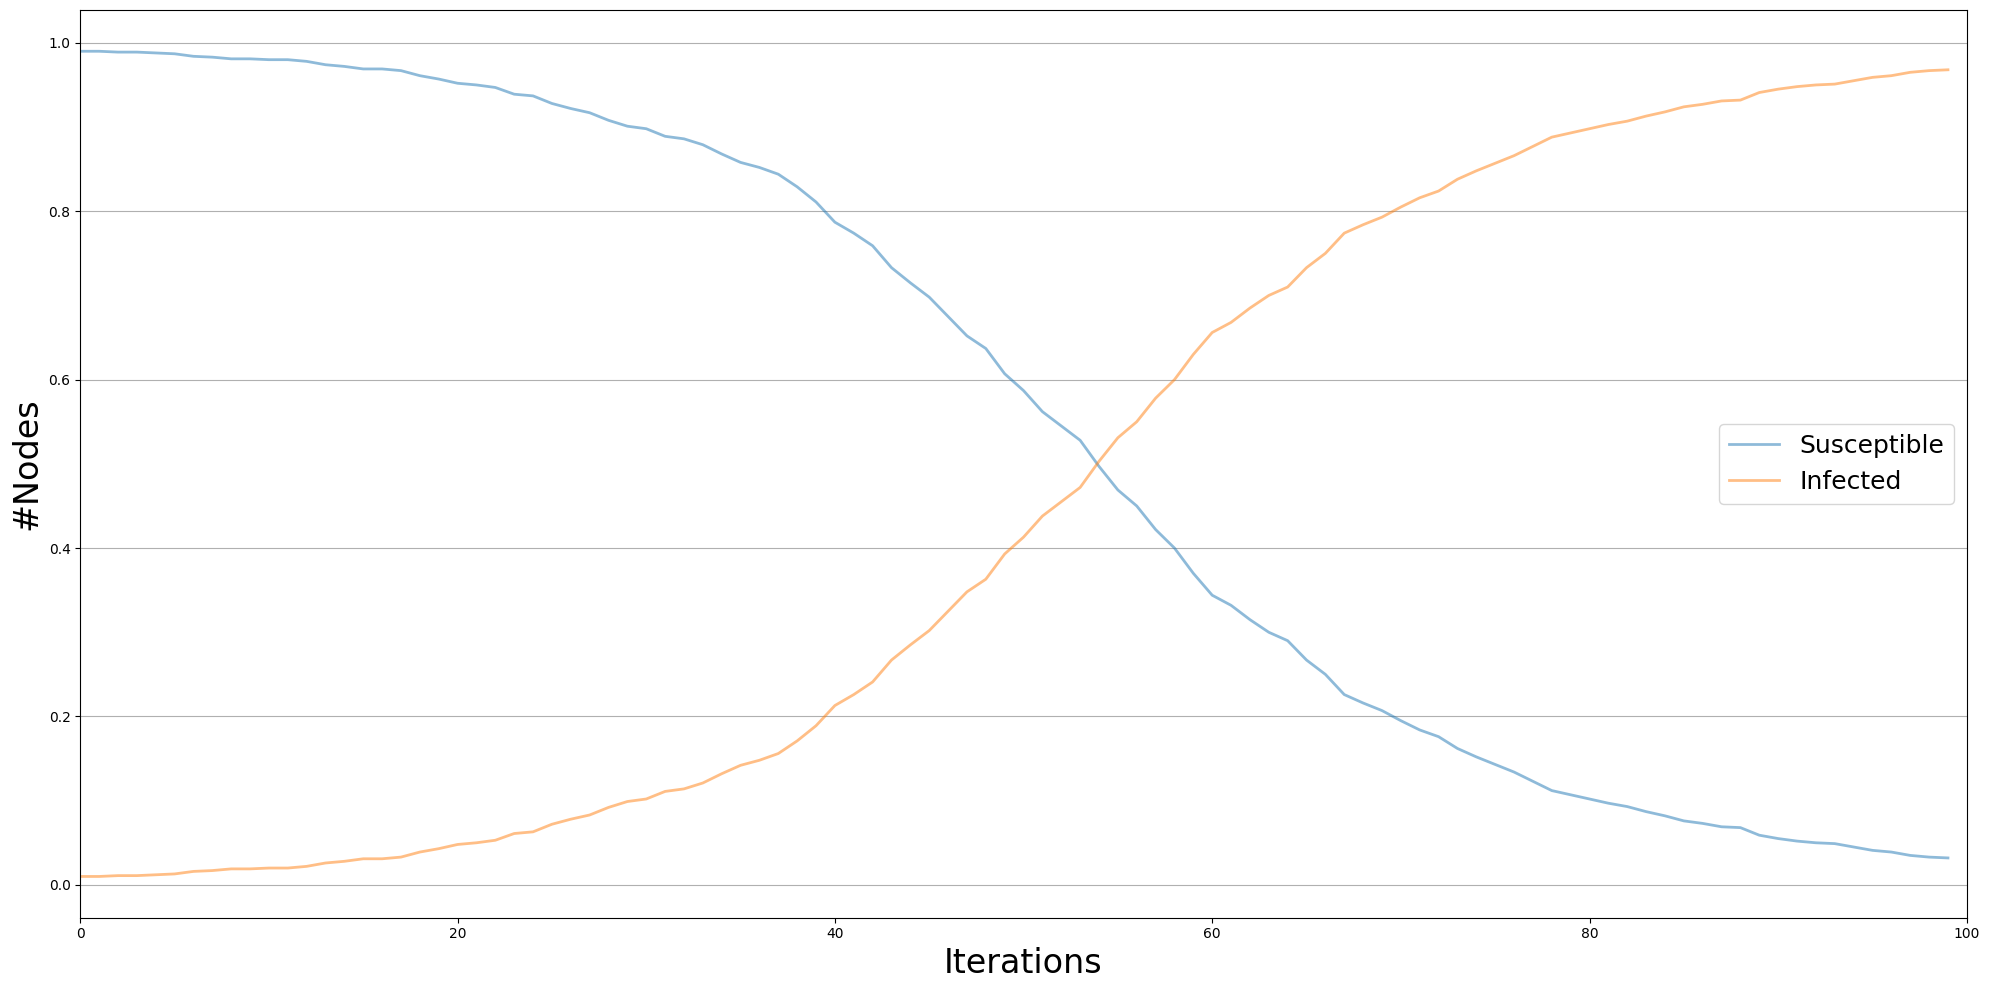

In [70]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

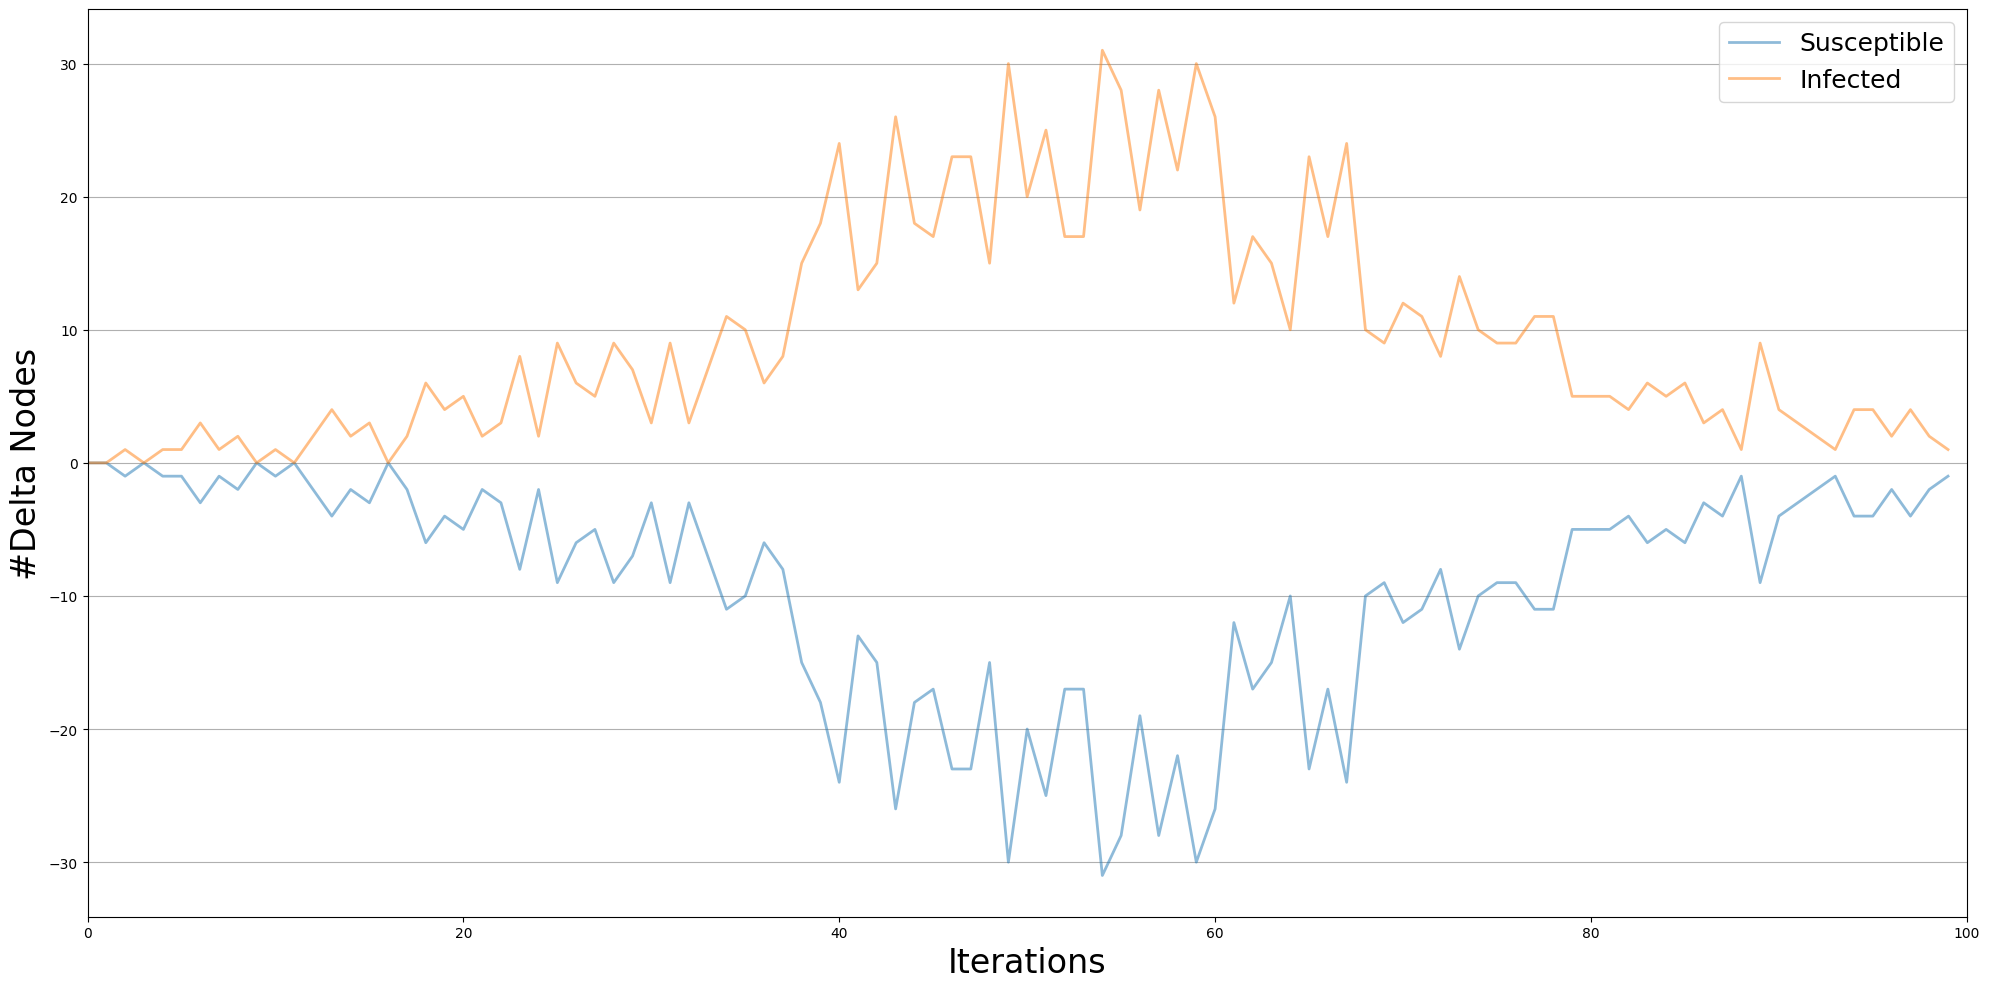

In [71]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
viz = DiffusionPrevalence(model, trends)
viz.plot()

<a id="sis"></a>
### SIS: Susceptible-Infected-Susceptible ([to top](#top))

Each individual has β contacts with randomly chosen others individuals per unit time.

Each infected individual has μ probability of revert its status to susceptible.

In [81]:
model = ep.SISModel(g)

In [82]:
model.available_statuses

{'Susceptible': 0, 'Infected': 1}

In [83]:
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01) # infection rate
cfg.add_model_parameter('lambda', 0.05) # recovery rate
cfg.add_model_parameter("percentage_infected", 0.01)
model.set_initial_status(cfg)

In [84]:
iterations = model.iteration_bunch(100, node_status=True)
trends = model.build_trends(iterations)

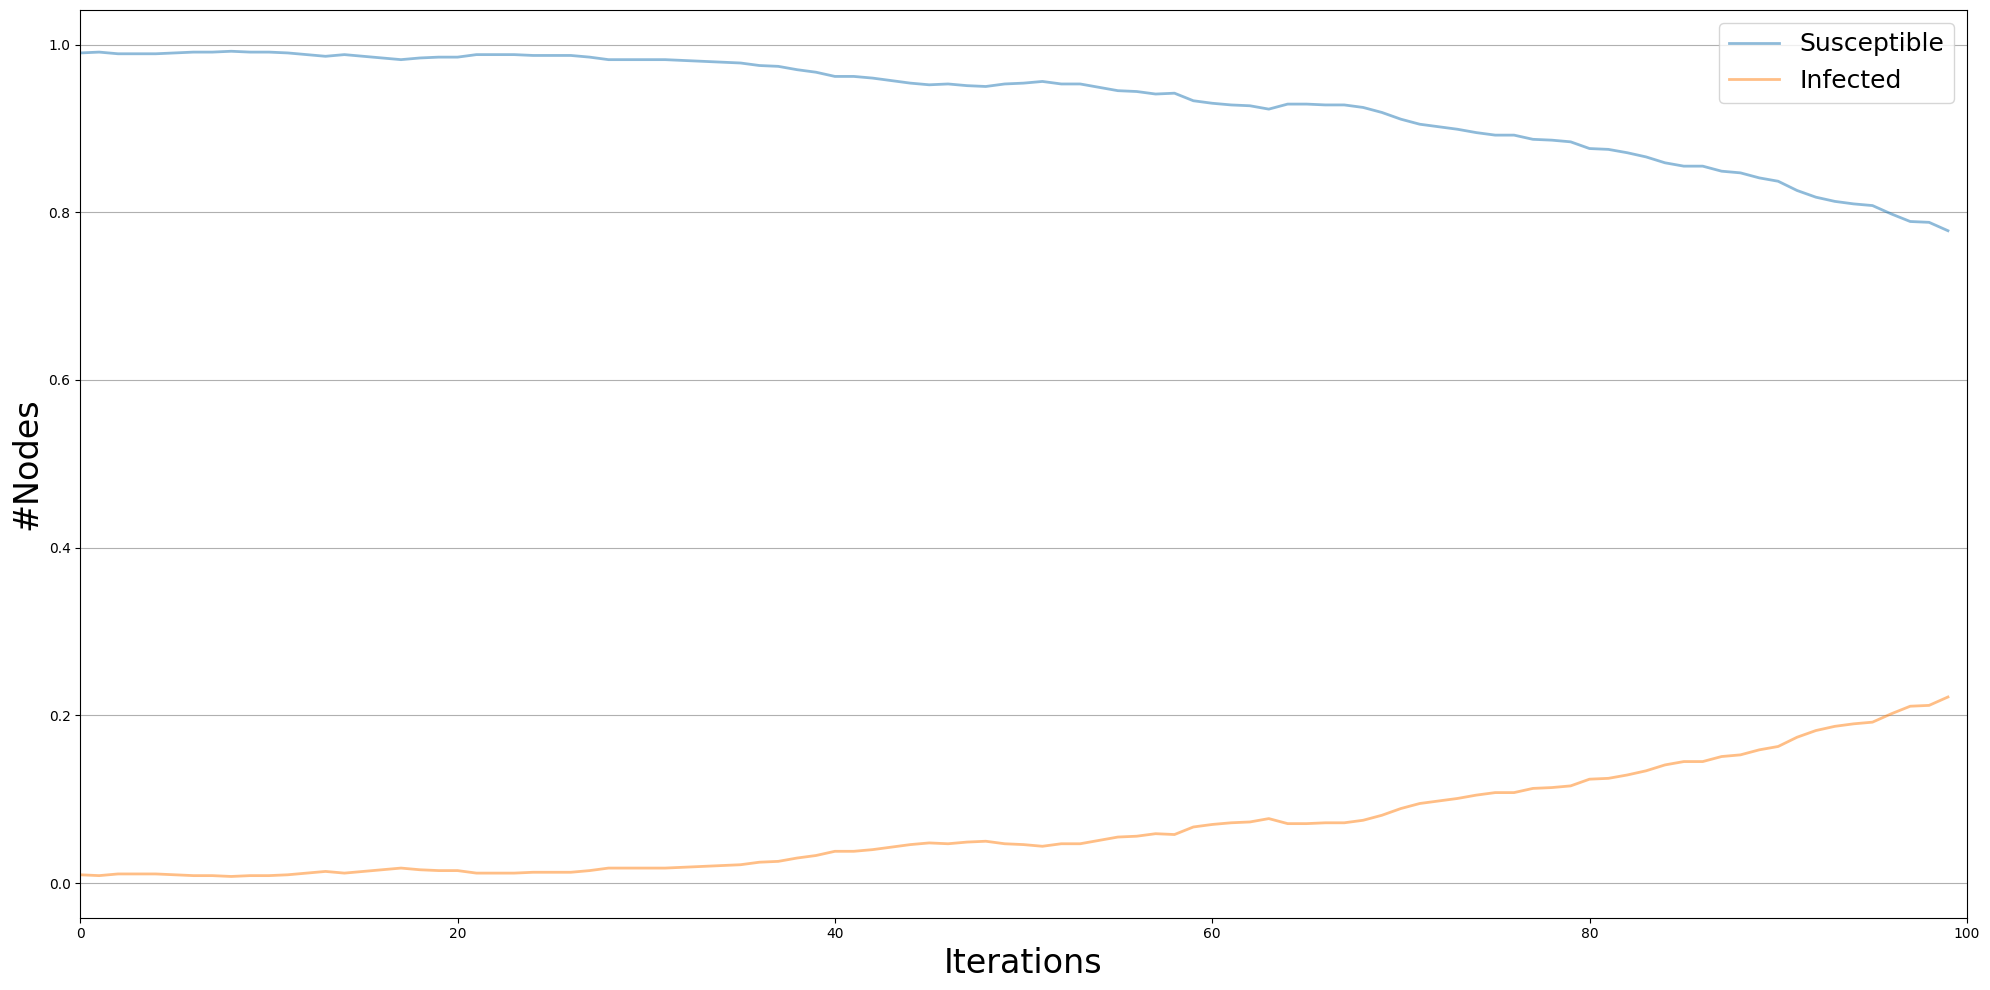

In [85]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

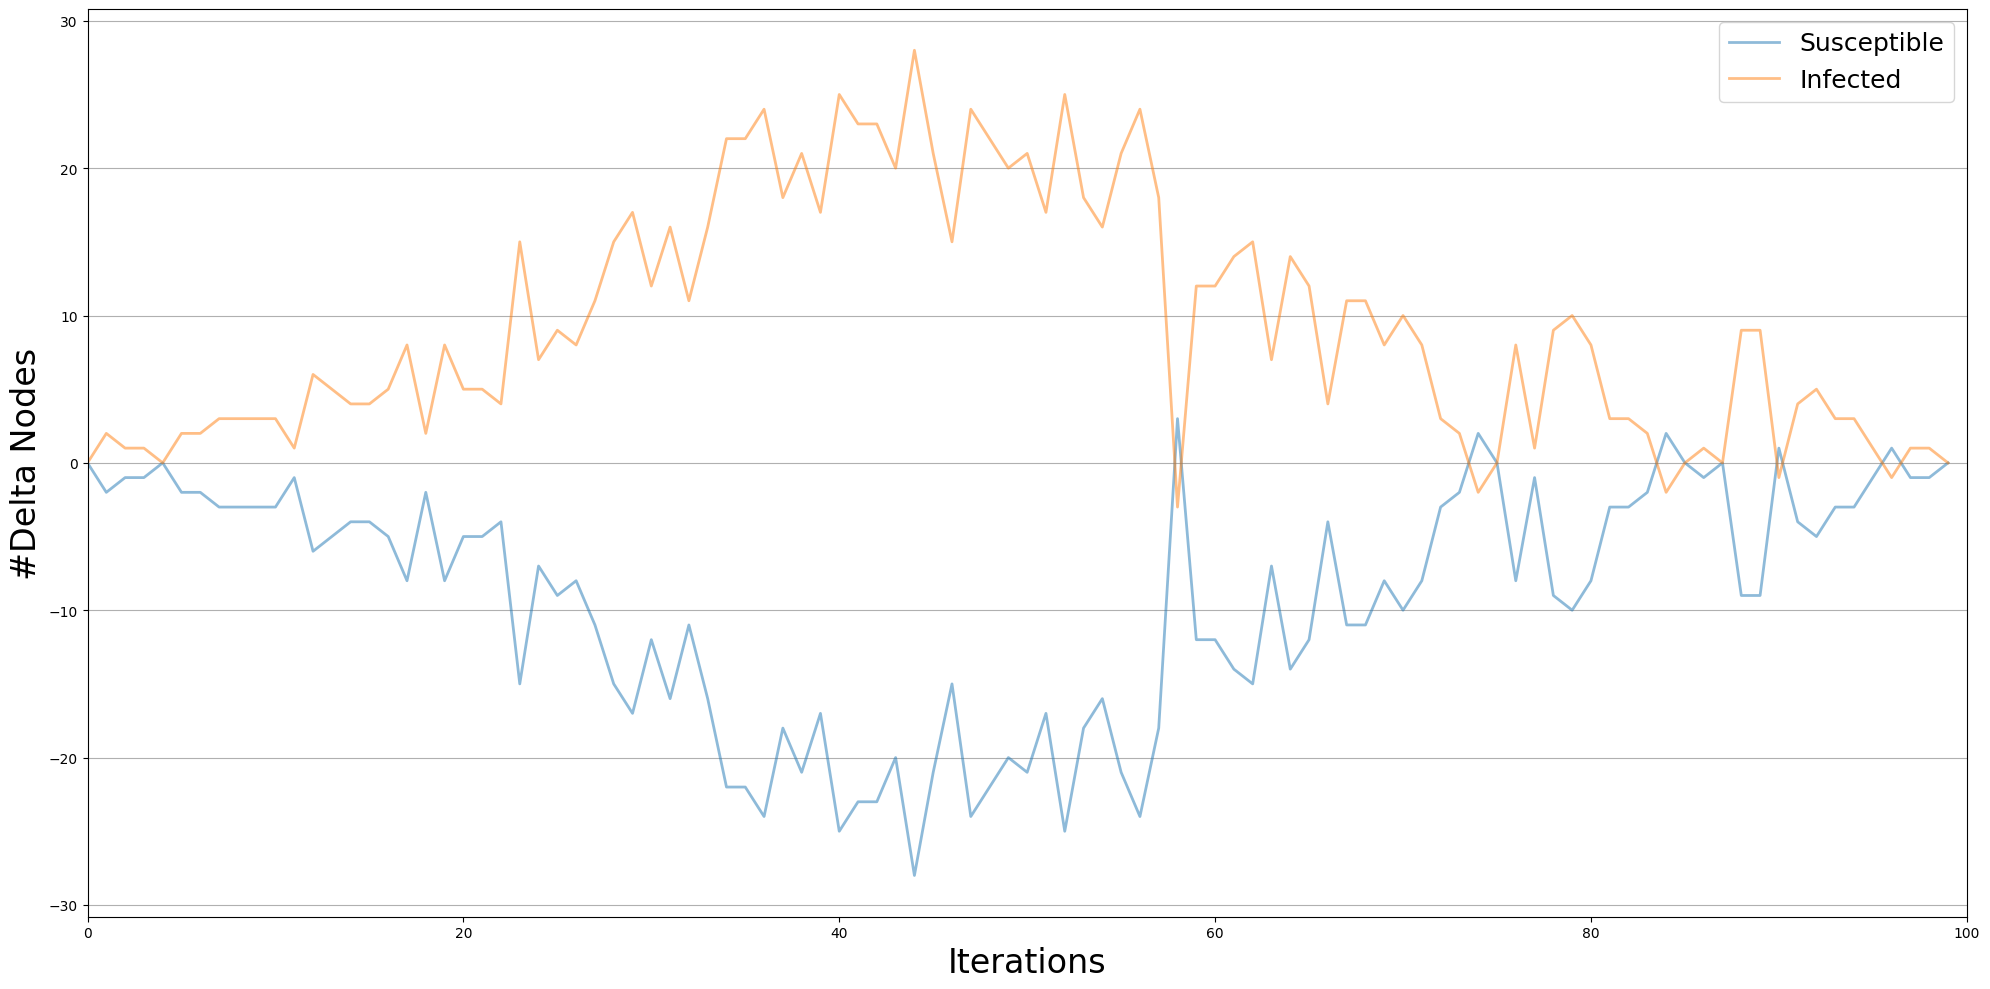

In [ ]:
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
viz = DiffusionPrevalence(model, trends)
viz.plot()

<a id="sir"></a>
### SIR: Susceptible-Infected-Recovered ([to top](#top))

Each individual has β contacts with randomly chosen others individuals per unit time.

Each infected individual has μ probability of becoming immune after being infected.


In [86]:
model = ep.SIRModel(g)

In [87]:
model.available_statuses

{'Susceptible': 0, 'Infected': 1, 'Removed': 2}

In [91]:
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01) # infection rate
cfg.add_model_parameter('gamma', 0.01) # recovery rate
cfg.add_model_parameter("percentage_infected", 0.01)
model.set_initial_status(cfg)

In [92]:
iterations = model.iteration_bunch(200, node_status=True)
trends = model.build_trends(iterations)

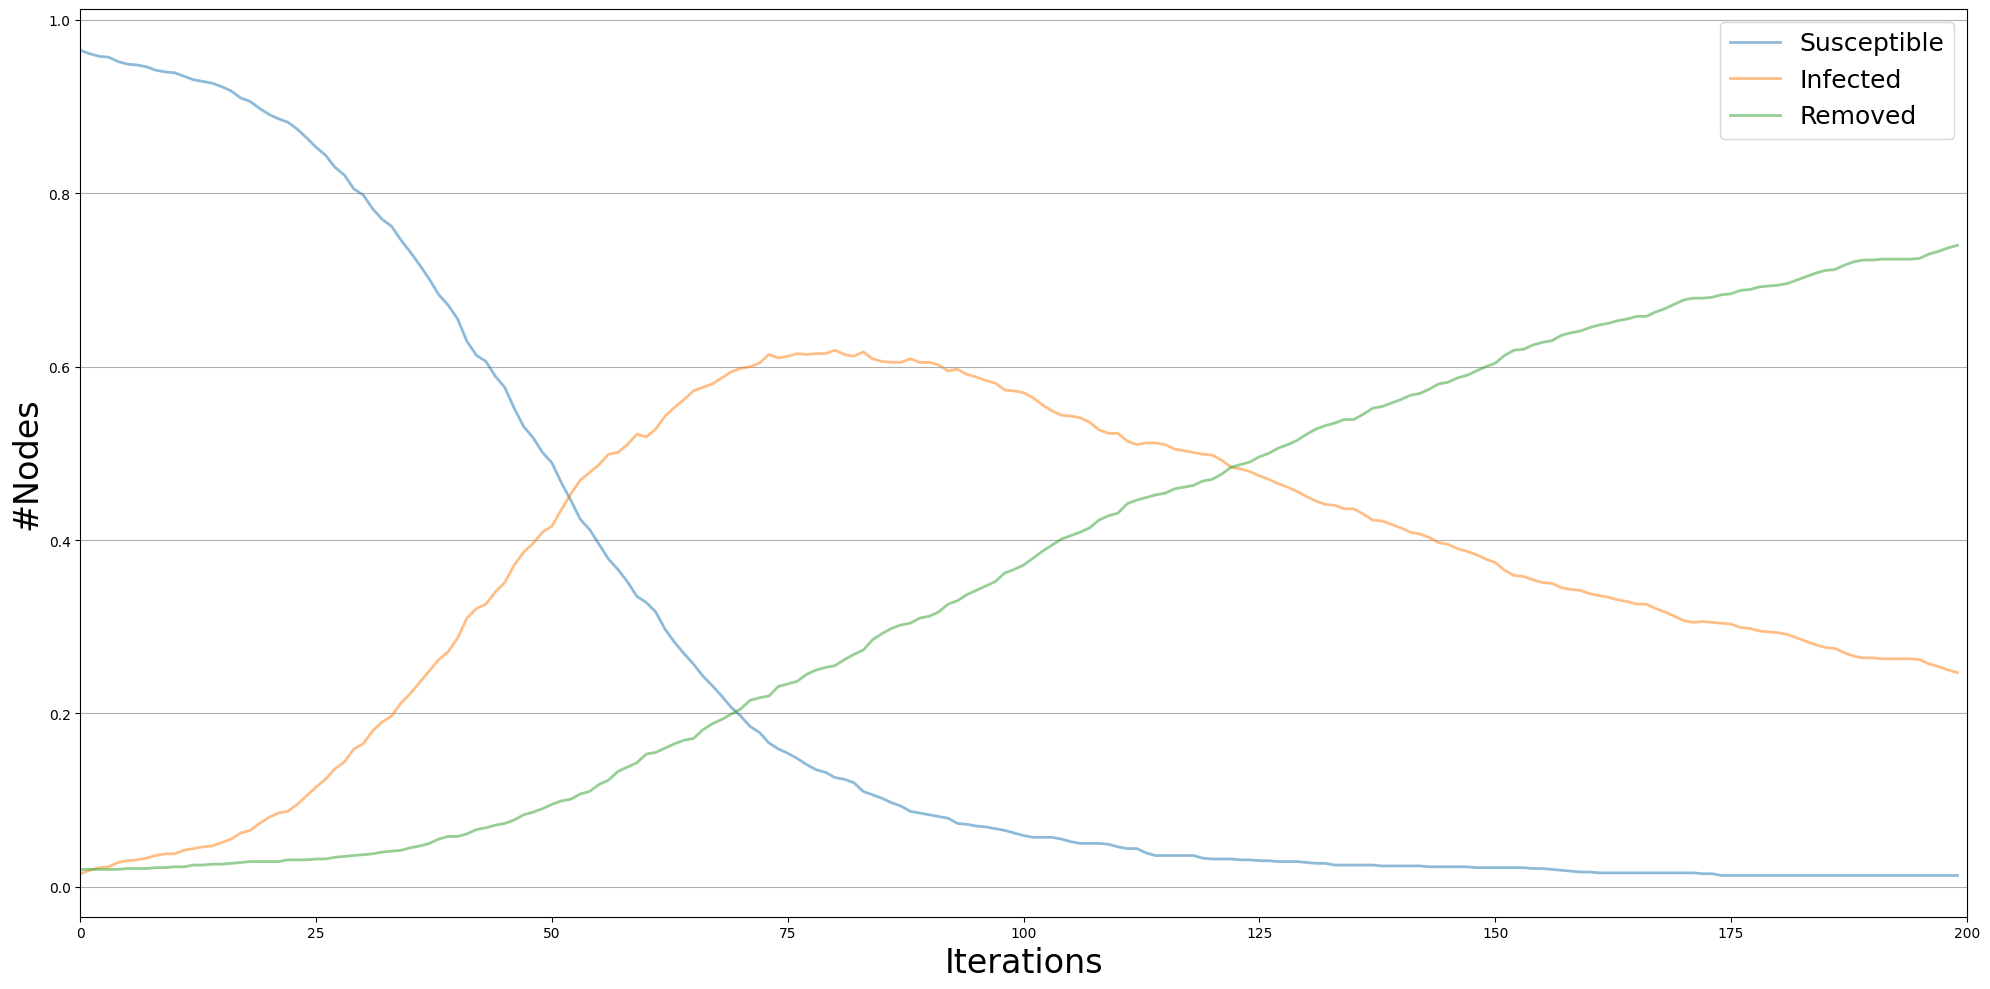

In [93]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

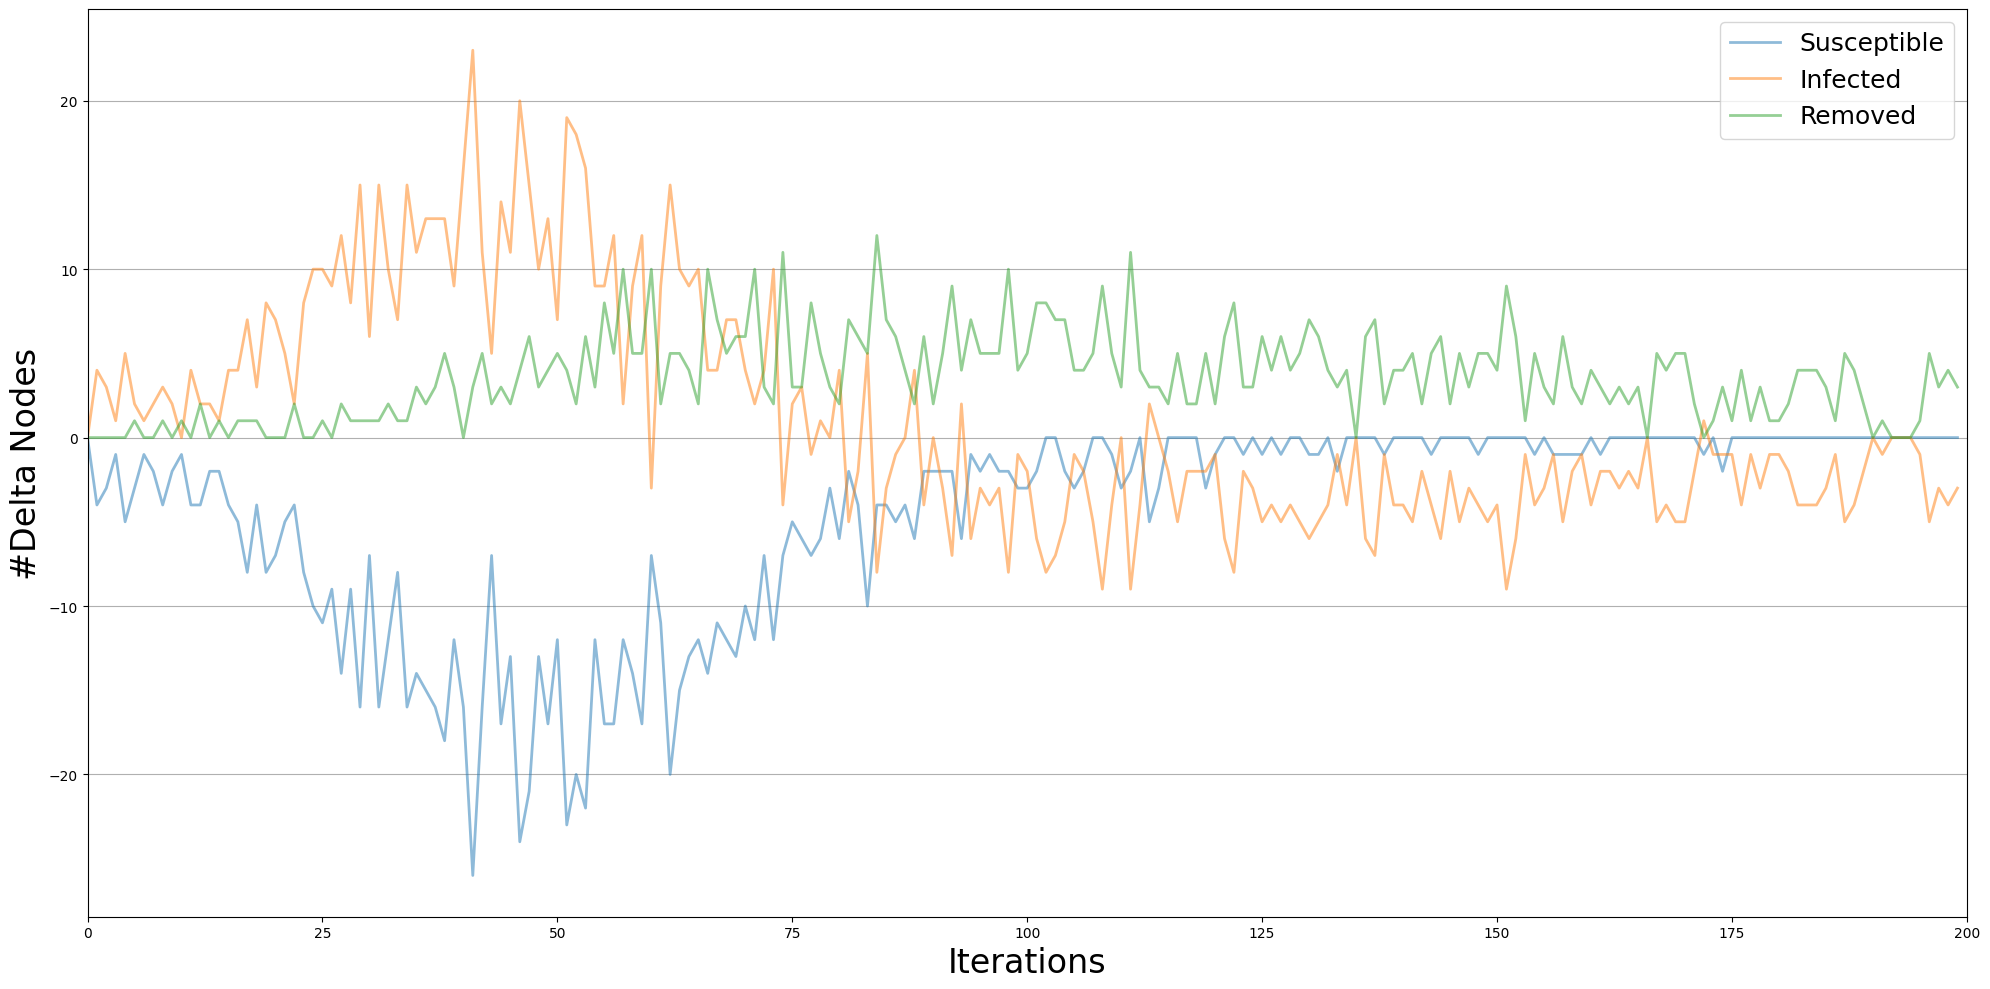

In [94]:
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
viz = DiffusionPrevalence(model, trends)
viz.plot()

<a id="models"></a>
### Available models ([to top](#top))

When we talk about epidemics, we think about contagious diseases caused by biological pathogens, like influenza, measles, chickenpox and sexually transmitted viruses that spread from person to person.

Several elements determine the patterns by which epidemics spread through groups of people: the properties carried by the pathogen (its contagiousness, the length of its infectious period and its severity), the structure of the network as well as the mobility patterns of the people involved.

In ``NDlib`` are implemented the following 12 Epidemic models:

<table>
    <tr>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/SIm.html'>SI</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/SIS.html'>SIS</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/SIR.html'>SIR</a></td>
    </tr>
    <tr>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/SEIR.html'>SEIR</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/SEIS.html'>SEIS</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/SWIR.html'>SWIR</a></td>
    </tr>
    <tr>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/Threshold.html'>Threshold</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/GeneralisedThreshold.html'>Generalised Threshold</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/KThreshold.html'>Kertesz Threshold</a></td>
    </tr>
    <tr>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/Profile.html'>Profile</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/ProfileThreshold.html'>Profile-Threshold</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/IndependentCascades.html'>Independent Cascades</a></td>
    </tr>
</table>

# *Opinion Dynamics*

In this notebook are introduced basilar versions of the SI/SIS/SIR models: for more advanced customizations refer to the ``NDlib`` documentation
Models of opinion evolution in a population.

Opinions are at the base of human behaviour, models are devised to:

- understand behaviour: which mechanisms are important?
- trigger changes in behaviour: study intervention methods to foster/reduce spreading

In [95]:
import ndlib.models.opinions as op

<a id="discrete"></a>
## Discrete Opinion models ([to top](#top))

Agents opinions vary in the discrete set [0, 1]

<a id="voter"></a>
### Voter Model ([to top](#top))

Originally introduced to analyse competition of species, then applied to electoral competitions.

Discrete opinions: {-1, 1}

Iteration:
- A random agent i is selected with one of its neighbors j
- i takes j’s opinion


In [96]:
model = op.VoterModel(g)
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.5)
model.set_initial_status(config)

iterations = model.iteration_bunch(1000)
trends = model.build_trends(iterations)

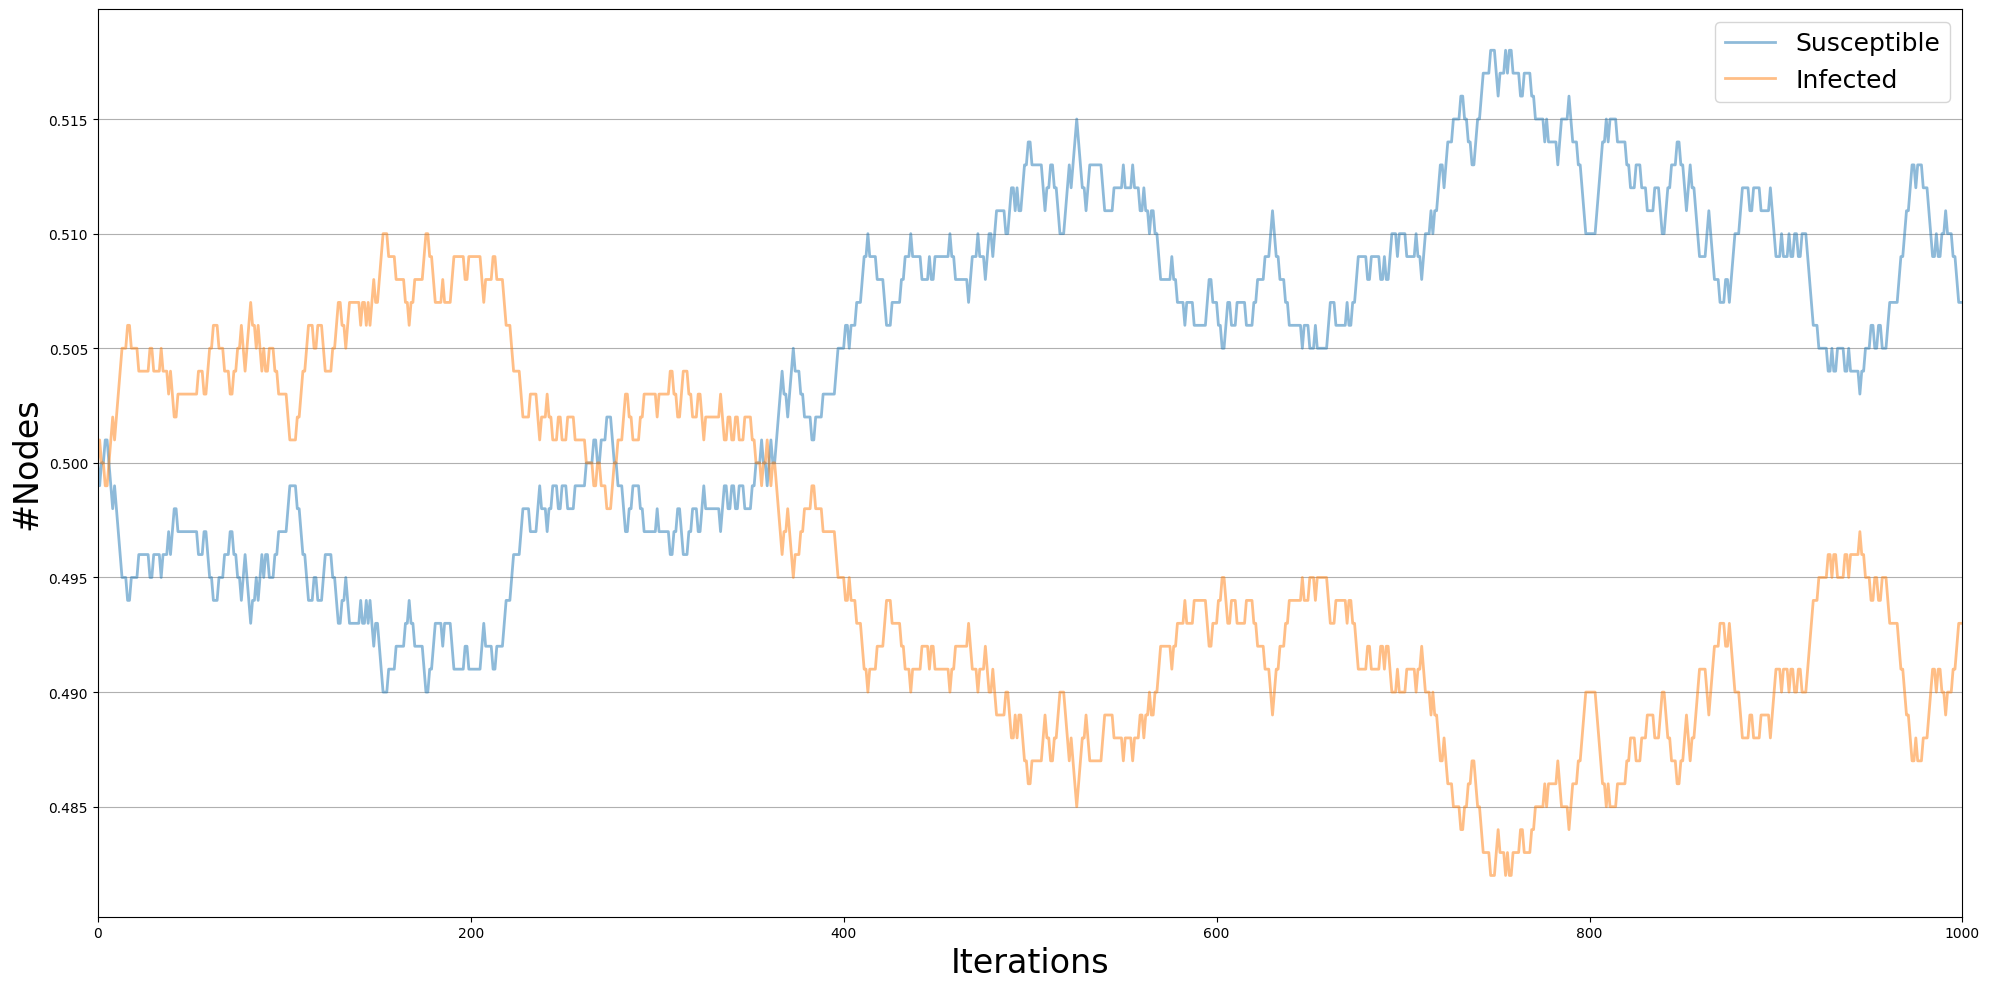

In [97]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

<a id="majority"></a>
### Majority Rule ([to top](#top))

Originally introduced to describe public debates (e.g., global warming, H1N1 pandemic).

Discrete opinions: {-1, 1}

Iteration:
- A random group of r agents is selected
- The agents take the majority opinion within the group

**r odd:**  majority always exists

**r even:** possibility of tied configurations. To address them, bias toward an opinion is introduced (social inertia)


In [98]:
model = op.MajorityRuleModel(g)
config = mc.Configuration()
config.add_model_parameter('q', 5)
config.add_model_parameter('fraction_infected', 0.5)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(200)
trends = model.build_trends(iterations)

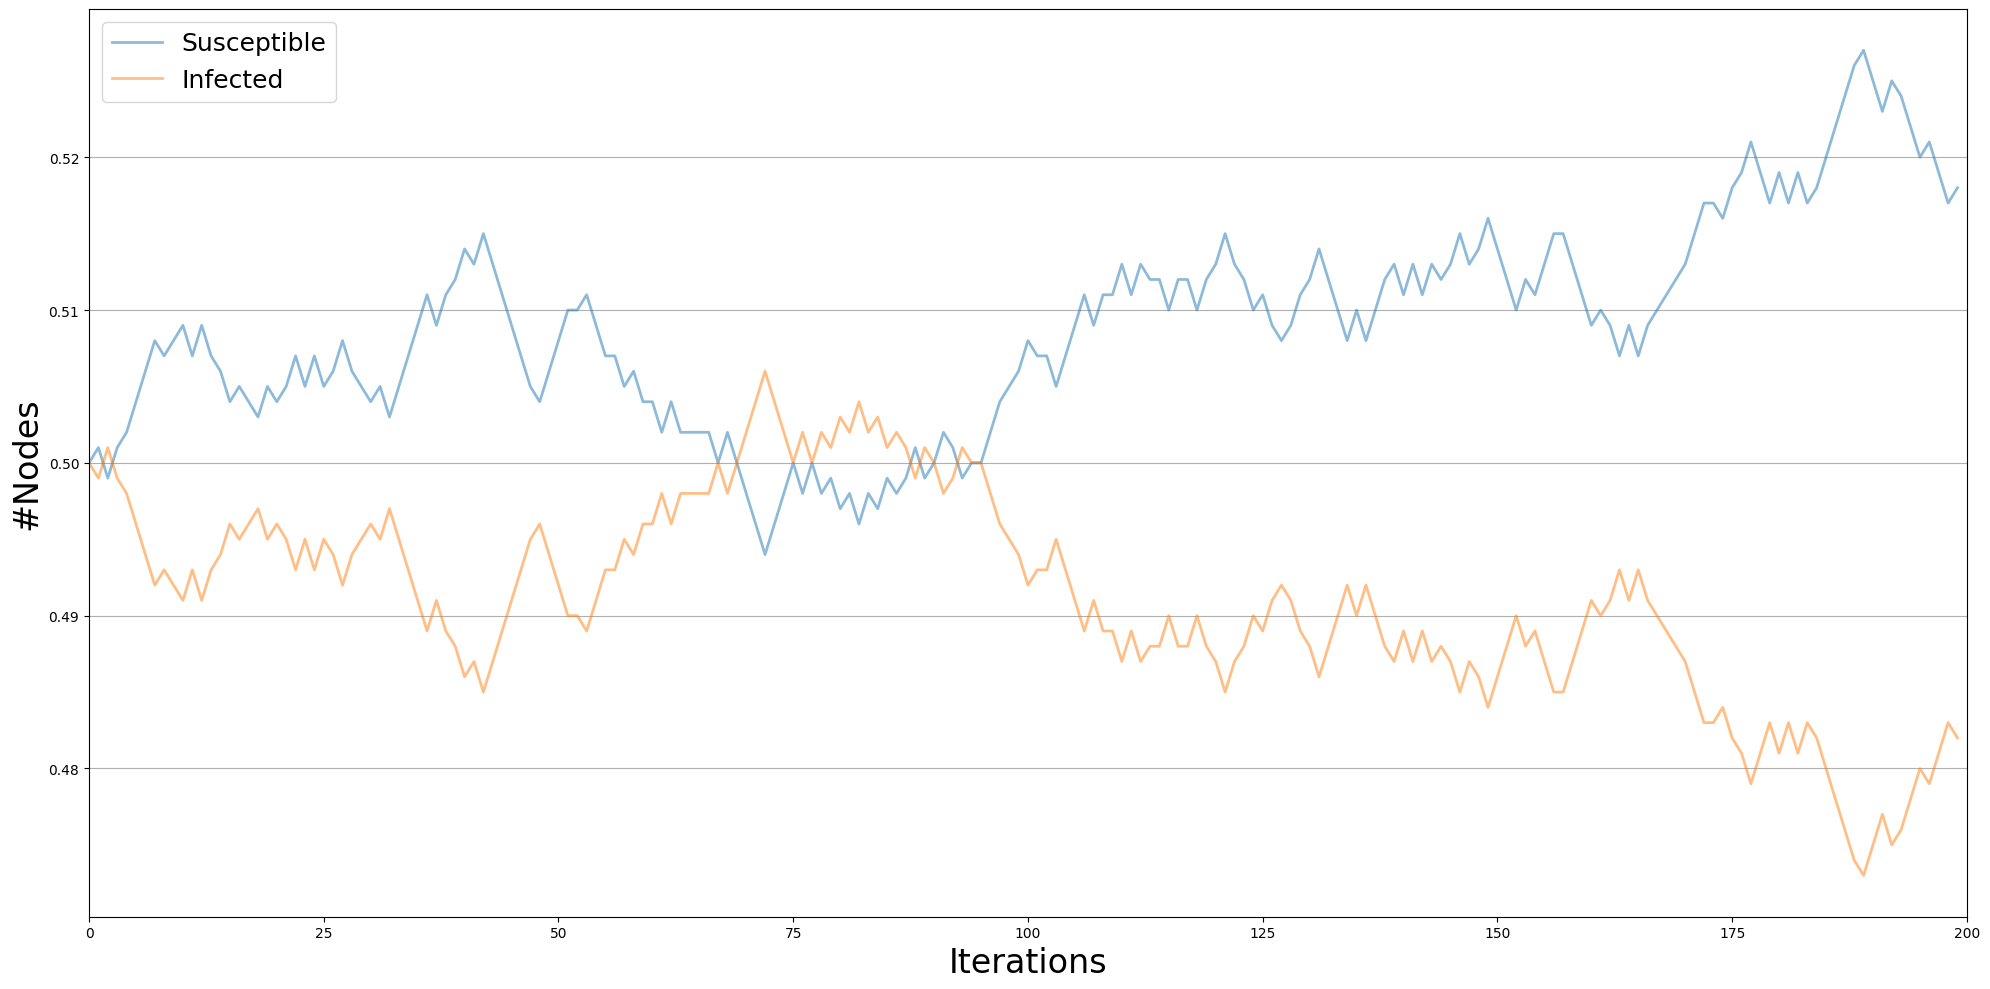

In [99]:
viz = DiffusionTrend(model, trends)
viz.plot()

<a id="continuos"></a>
## Continuos Opinion models ([to top](#top))

Agents opinions vary in the continous set [0,1]

<a id="deffuant"></a>
### Deffuant ([to top](#top))

Simple model of opinion formation, with bounded confidence

Opinions xi ∈ [0,1] (Continuous values)   

Discrete time steps

Iteration:

Two random individuals interact with bounded confidence 𝝐 (open-mindness)
- xi(t+1) = xj(t+1) = (xi(t)+xj(t))/2
- only if |xi(t+1)-xj(t+1)| < 𝝐


In [100]:
model = op.AlgorithmicBiasModel(g)

# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.32)
config.add_model_parameter("gamma", 0)  # No bias = Deffuant
model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(100)

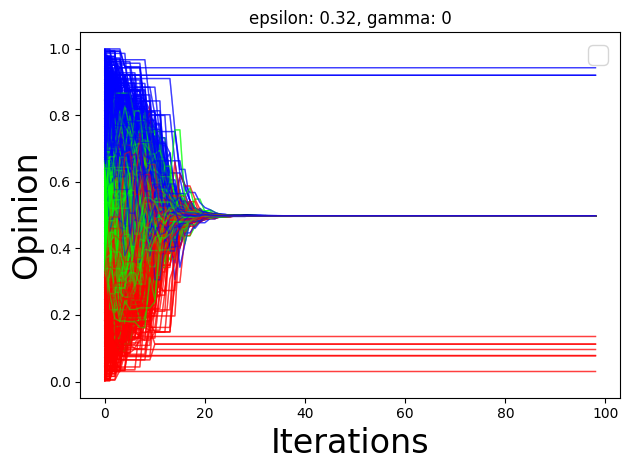

In [102]:
%matplotlib inline
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution
viz = OpinionEvolution(model, iterations)
viz.plot()

In [103]:
model = op.AlgorithmicBiasModel(g)

# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.32)
config.add_model_parameter("gamma", 1)
model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(100)

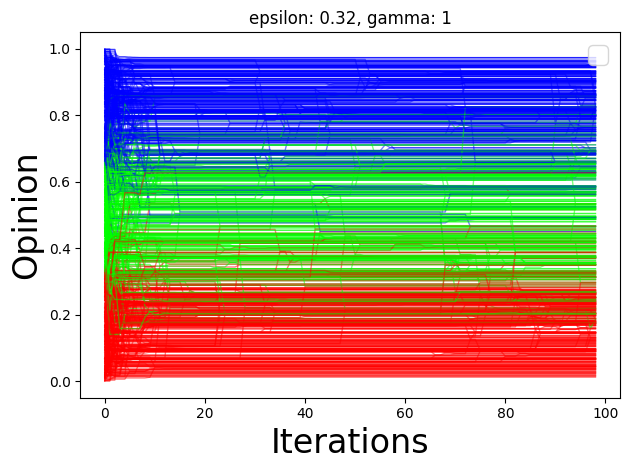

In [104]:
%matplotlib inline
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution
viz = OpinionEvolution(model, iterations)
viz.plot()

<a id="opinions"></a>
### 3.B Opinion Dynamics ([to top](#top))

Recent years have witnessed the introduction of a wide range of models that attempt to explain how opinions form in a population, taking into account various social theories (e.g. bounded confidence or social impact).

These models have a lot in common with those seen in epidemics and spreading. In general, individuals are modelled as agents with a state and connected by a social network.

The social links can be represented by a complete graph (*mean field* models) or by more realistic complex networks, similar to epidemics and spreading.

The state is typically represented by variables, that can be *discrete* (similar to the case of spreading), but also *continuous*, representing for instance a probability to choose one option or another. The state of individuals changes in time, based on a set of update rules, mainly through interaction with the neighbours.

While in many spreading and epidemics models this change is irreversible (susceptible to infected), in opinion dynamics the state can oscillate freely between the possible values, simulating thus how opinions change in reality.

In ``NDlib`` are implemented the following 6 Opinion Dynamics models:

<table>
    <tr>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/opinion/Voter.html'>Voter</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/opinion/QVoter.html'>Q-Voter</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/opinion/MajorityRule.html'>Majority Rule</a></td>
    </tr>
    <tr>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/opinion/Snajzd.html'>Sznajd</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/opinion/COD.html'>Cognitive Opinion Dynamics</a></td>
        <td><a href='http://ndlib.readthedocs.io/en/latest/reference/models/opinion/AlgorithmicBias.html'>Algorithmic Bias</a></td>
    </tr>
</table>